In [1]:
path_feather = "/home/jan/mafiasi-cloud/UHH/BA/data/pre-analysis/HLVS/2022_23/K-GD2/K-GD2-1/referee_data_collection_COMPLETE_2023-04-01T16-03-28.feather"
path_pkl = "/home/jan/mafiasi-cloud/UHH/BA/data/pre-analysis/HLVS/2022_23/K-GD2/K-GD2-1/referee_data_collection_COMPLETE_2023-04-01T16-03-28.pkl"

In [2]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import seaborn.objects as so

/home/jan/.local/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [3]:
# Load data
data_feater = pd.read_feather(path_feather)
data_pickle = pd.read_pickle(path_pkl)

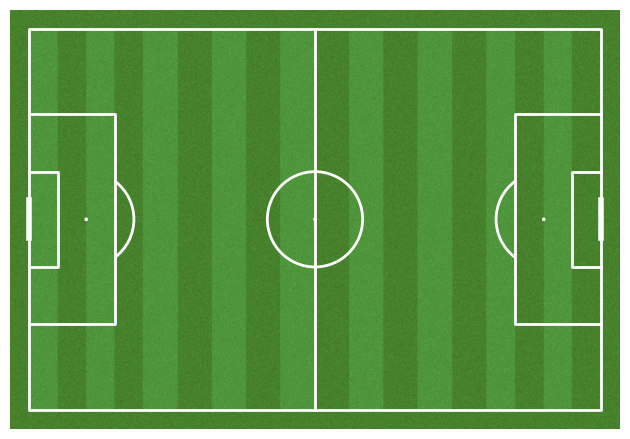

In [4]:
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()
plt.show()

In [5]:
data_feater

,time,delta_real_time,game_control_data.game_state,game_control_data.first_half,game_control_data.kickoff_team,game_control_data.secondary_state,game_control_data.secondary_state_info_team,game_control_data.secondary_state_info_sub_state,game_control_data.drop_in_team,game_control_data.drop_in_time,...,teams.team2.player4.action,teams.team2.player4.robot_info.penalty,teams.team2.player4.robot_info.secs_till_unpenalized,teams.team2.player4.robot_info.number_of_warnings,teams.team2.player4.robot_info.number_of_yellow_cards,teams.team2.player4.robot_info.number_of_red_cards,teams.team2.player4.robot_info.goalkeeper,teams.team2.score,teams.team2.penalty_shots,teams.team2.single_shots
0,0.056,0.070435,0,True,7,0,0,0,False,65535,...,0,14,0,0,0,0,False,0,0,0
1,0.120,0.061308,0,True,7,0,0,0,False,65535,...,0,14,0,0,0,0,False,0,0,0
2,0.184,0.057572,0,True,7,0,0,0,False,65535,...,0,14,0,0,0,0,False,0,0,0
3,0.248,0.060082,0,True,7,0,0,0,False,65535,...,0,14,0,0,0,0,False,0,0,0
4,0.312,0.056615,0,True,7,0,0,0,False,65535,...,0,14,0,0,0,0,False,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25539,1634.552,0.019491,3,False,7,0,0,0,False,65535,...,0,14,0,0,0,0,False,2,0,0
25540,1634.616,0.022434,3,False,7,0,0,0,False,65535,...,0,14,0,0,0,0,False,2,0,0
25541,1634.680,0.019560,3,False,7,0,0,0,False,65535,...,0,14,0,0,0,0,False,2,0,0
25542,1634.744,0.020122,3,False,7,0,0,0,False,65535,...,0,14,0,0,0,0,False,2,0,0


In [6]:
for s in data_feater.columns:
    print(s)

time
delta_real_time
game_control_data.game_state
game_control_data.first_half
game_control_data.kickoff_team
game_control_data.secondary_state
game_control_data.secondary_state_info_team
game_control_data.secondary_state_info_sub_state
game_control_data.drop_in_team
game_control_data.drop_in_time
game_control_data.seconds_remaining
game_control_data.secondary_seconds_remaining
ball.id
ball.frame.id
ball.frame.pose.position.x
ball.frame.pose.position.y
ball.frame.pose.position.z
ball.frame.pose.rotation.x
ball.frame.pose.rotation.y
ball.frame.pose.rotation.z
ball.frame.pose.rotation.w
teams.team1.id
teams.team1.player1.id
teams.team1.player1.base_link.position.x
teams.team1.player1.base_link.position.y
teams.team1.player1.base_link.position.z
teams.team1.player1.base_link.rotation.x
teams.team1.player1.base_link.rotation.y
teams.team1.player1.base_link.rotation.z
teams.team1.player1.base_link.rotation.w
teams.team1.player1.l_sole.position.x
teams.team1.player1.l_sole.position.y
teams.t

<Axes: xlabel='ball.frame.pose.position.x', ylabel='ball.frame.pose.position.y'>

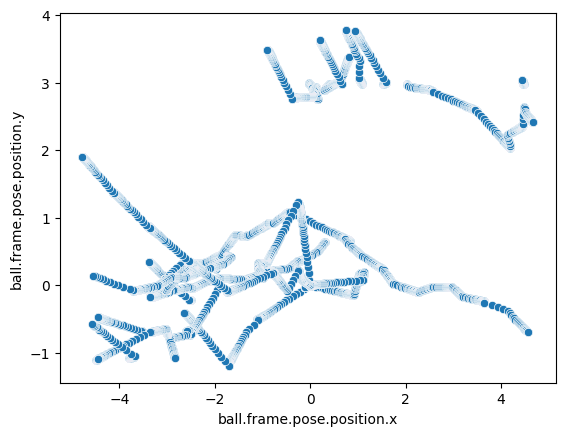

In [7]:
# Filter out ball positions at 100, 100
filtered_df = data_feater.loc[(data_feater['ball.frame.pose.position.x'] >= -10) & (data_feater['ball.frame.pose.position.x'] <= 10)].copy()
sns.scatterplot(filtered_df, x="ball.frame.pose.position.x", y="ball.frame.pose.position.y")

<Axes: xlabel='teams.team1.player1.base_link.position.x', ylabel='teams.team1.player1.base_link.position.y'>

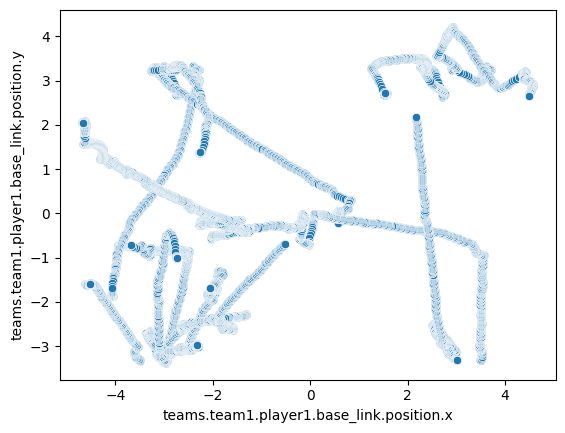

In [8]:
teams = 1
player = 1
sns.scatterplot(data_feater, x=f"teams.team{teams}.player{player}.base_link.position.x", y=f"teams.team{teams}.player{player}.base_link.position.y")

# Questions

- Why does game_control_data.kickoff_team 128 exist?